In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../csvs/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
6,2732,4,135.0
17,1540,3,60.0
18,2770,3,102.0
5,1170,2,38.0


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
sxobj = MinMaxScaler()
syobj = MinMaxScaler()

In [5]:
sx = sxobj.fit_transform(df[["area" , "bedrooms"]])
sy = syobj.fit_transform(df[["price"]])

In [6]:
sy

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [7]:
sy = sy.reshape(20,)

In [8]:
sx.shape , sy.shape

((20, 2), (20,))

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(sx , sy ,test_size=0.33)

In [13]:
def batchGradientDescent(X , y , epoche , learning_rate):
    no_of_features = X.shape[1]
    bias = 0
    weights = np.ones(shape=(no_of_features))
    total_samples = X.shape[0]
    cost_arr = []
    epoche_arr = []
    
    for i in range(epoche):
        y_predicted = np.dot(weights , X.T) + bias 
        # print(y_predicted.shape ,weights.shape ,  X.T.shape ) 
        cost = np.mean(np.square(y - y_predicted))
        
        derivative_wrt_w = -(2/total_samples) * (X.T.dot(y-y_predicted))
        derivative_wrt_bias = -(2/total_samples) * np.sum(y - y_predicted)
        # print(derivative_wrt_w.shape ,derivative_wrt_bias.shape  ) 
        weights = weights - learning_rate*derivative_wrt_w
        bias = bias - learning_rate*derivative_wrt_bias
        
        if i%50 == 0:
            cost_arr.append(cost)
            epoche_arr.append(i)
    return weights , bias , cost_arr , epoche_arr        

In [14]:
weights , bias , cost_arr , epoche_arr  = batchGradientDescent(X_train , y_train , 500 , 0.5)

In [15]:
weights , bias

(array([0.80900393, 0.40708002]), -0.14062824119141312)

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

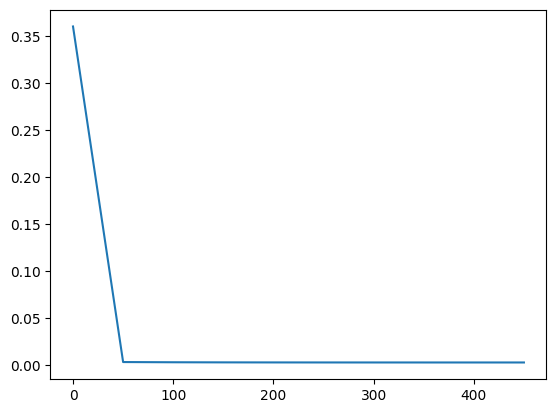

In [16]:
sns.lineplot(epoche_arr , cost_arr)

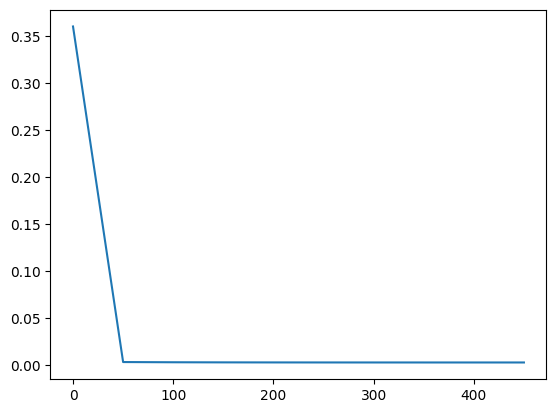

In [17]:
plt.plot(epoche_arr , cost_arr)

In [18]:
cost_arr[-1]

0.003032185610231995

In [21]:
def stochasticGradientDescent(X , y , epoche , learning_rate):
    weights = np.ones(shape=X.shape[1])
    bias = 0
    n = X.shape[0]
    cost_arr = []
    epoche_arr = []
    
    for i in range(epoche):
        index = np.random.randint(0 , X.shape[0])
        
        y_predicted = np.dot(weights , X[index].T) + bias
        cost = np.mean(np.square(y[index] - y_predicted)) # same as loss since it is only one point , no need to apply mean
        derivative_wrt_w = -(2/n) * np.dot(X[index].T , (y[index]-y_predicted))
        derivative_wrt_b = -(2/n) * np.sum(y[index] - y_predicted)

        weights = weights - learning_rate*derivative_wrt_w
        bias = bias - learning_rate*derivative_wrt_b
        
        if i%10 == 0:
                cost_arr.append(cost)
                epoche_arr.append(i)
                
    return weights , bias , cost_arr , epoche_arr        

In [22]:
weights , bias , cost_arr , epoche_arr  = stochasticGradientDescent(X_train , y_train , 500 , 0.5)

In [ ]:
weights , bias 

(array([0.71738502, 0.473321  ]), -0.11396236771855982)

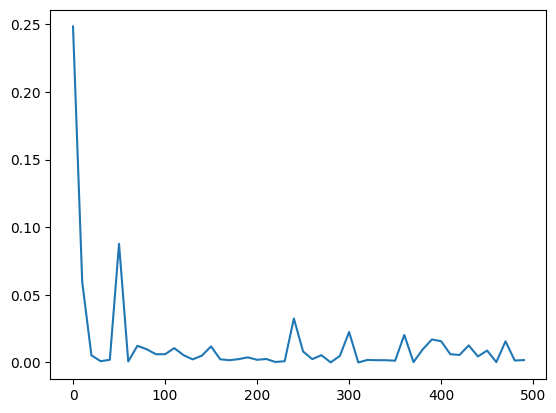

In [ ]:
plt.plot(epoche_arr , cost_arr)

In [ ]:
np.random.randint(0 , X_train.shape[0])

5

In [29]:
def miniBatchGradientDescent(X , y , epoche , learning_rate , batch_size):
    weights = np.ones(shape=X.shape[1])
    bias = 0
    n = X.shape[0]
    cost_arr = []
    epoche_arr = []
    
    if  batch_size> n:
        batch_size = n
    
    total_batches = n//batch_size    
    
    for i in range(epoche):
        
        shuffeled_indecis = np.random.permutation(n)
        X_temp = X[shuffeled_indecis]
        y_temp = y[shuffeled_indecis]
        
        temp_cost = []
        
        for j in range(0 , n , batch_size):
            X_batch = X_temp[j:j+batch_size]
            y_batch = y_temp[j:j+batch_size]
            
            y_batch_predicted = np.dot(weights , X_batch.T) + bias
            
            cost_batch = np.mean(np.square(y_batch - y_batch_predicted))
            temp_cost.append(cost_batch)
            
            derivative_wrt_w = -(2/batch_size)* np.dot(X_batch.T , (y_batch - y_batch_predicted))
            derivative_wrt_b = -(2/batch_size)* np.mean(y_batch - y_batch_predicted)
            
            weights = weights - learning_rate * derivative_wrt_w
            bias = bias - learning_rate * derivative_wrt_b
        
        if i%10 == 0:
            cost_arr.append(np.mean(temp_cost))     
            epoche_arr.append(i)
            
    return weights , bias , cost_arr , epoche_arr           

In [30]:
weights , bias , cost_arr , epoche_arr  = miniBatchGradientDescent(X_train , y_train , 500 , 0.5 , 3)

In [31]:
weights , bias 

(array([0.81219152, 0.48917181]), -0.16505546706204455)

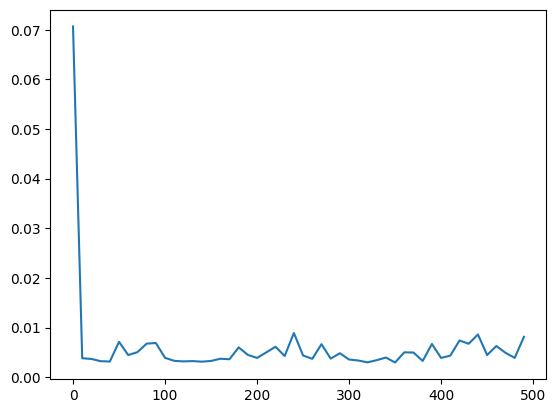

In [32]:
plt.plot(epoche_arr , cost_arr)